In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
try:
    import plotly.offline as pyo
    pyo.init_notebook_mode(connected=True)
    PLOTLY_AVAILABLE = True
except:
    PLOTLY_AVAILABLE = False
from scipy import stats
from scipy.stats import pearsonr, spearmanr
import os
from datetime import datetime
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 50)
plt.style.use('default')
sns.set_palette("husl")
print("✅ All libraries imported successfully!")
if PLOTLY_AVAILABLE:
    print("📊 Plotly interactive visualizations enabled!")
else:
    print("📊 Using matplotlib fallback for visualizations")
print(f"📅 Analysis performed on: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")


✅ All libraries imported successfully!
📊 Plotly interactive visualizations enabled!
📅 Analysis performed on: 2026-01-29 08:50:04


In [2]:
data_path = '../data/raw/dataset.csv'
try:
    df = pd.read_csv(data_path)
    print("✅ Dataset loaded successfully!")
    print(f"📊 Dataset shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
    print(f"💾 Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
except FileNotFoundError:
    print("❌ Dataset file not found. Please check the file path.")
except Exception as e:
    print(f"❌ Error loading dataset: {e}")


✅ Dataset loaded successfully!
📊 Dataset shape: 503 rows × 15 columns
💾 Memory usage: 1.04 MB


In [3]:
print("📋 First 5 rows of the dataset:")
print("=" * 80)
display(df.head())


📋 First 5 rows of the dataset:


,Symbol,Name,Address,Sector,Industry,Full Time Employees,Description,Total ESG Risk score,Environment Risk Score,Governance Risk Score,Social Risk Score,Controversy Level,Controversy Score,ESG Risk Percentile,ESG Risk Level
0,ENPH,"Enphase Energy, Inc.","47281 Bayside Parkway\r\nFremont, CA 94538\r\n...",Technology,Solar,"3,157","Enphase Energy, Inc., together with its subsid...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,EMN,Eastman Chemical Company,"200 South Wilcox Drive\r\nKingsport, TN 37662\...",Basic Materials,Specialty Chemicals,"14,000",Eastman Chemical Company operates as a special...,25.3,12.8,6.6,5.8,Moderate Controversy Level,2.0,50th percentile,Medium
2,DPZ,Domino's Pizza Inc.,"30 Frank Lloyd Wright Drive\r\nAnn Arbor, MI 4...",Consumer Cyclical,Restaurants,"6,500","Domino's Pizza, Inc., through its subsidiaries...",29.2,10.6,6.3,12.2,Moderate Controversy Level,2.0,66th percentile,Medium
3,DAY,"Dayforce, Inc.","3311 East Old Shakopee Road\r\nMinneapolis, MN...",Technology,Software - Application,"9,084","Dayforce Inc., together with its subsidiaries,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,DVA,Davita Inc.,"2000 16th Street\r\nDenver, CO 80202\r\nUnited...",Healthcare,Medical Care Facilities,"70,000",DaVita Inc. provides kidney dialysis services ...,22.6,0.1,8.4,14.1,Moderate Controversy Level,2.0,38th percentile,Medium


In [4]:
print("📊 Dataset Information:")
print("=" * 50)
print(f"Shape: {df.shape}")
print(f"\nColumn Names ({len(df.columns)} total):")
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")
print("\n📈 Data Types:")
print(df.dtypes)


📊 Dataset Information:
Shape: (503, 15)

Column Names (15 total):
 1. Symbol
 2. Name
 3. Address
 4. Sector
 5. Industry
 6. Full Time Employees
 7. Description
 8. Total ESG Risk score
 9. Environment Risk Score
10. Governance Risk Score
11. Social Risk Score
12. Controversy Level
13. Controversy Score
14. ESG Risk Percentile
15. ESG Risk Level

📈 Data Types:
Symbol                     object
Name                       object
Address                    object
Sector                     object
Industry                   object
Full Time Employees        object
Description                object
Total ESG Risk score      float64
Environment Risk Score    float64
Governance Risk Score     float64
Social Risk Score         float64
Controversy Level          object
Controversy Score         float64
ESG Risk Percentile        object
ESG Risk Level             object
dtype: object


In [5]:
print("🔍 Detailed Dataset Information:")
print("=" * 50)
df.info()


🔍 Detailed Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Symbol                  503 non-null    object 
 1   Name                    503 non-null    object 
 2   Address                 502 non-null    object 
 3   Sector                  502 non-null    object 
 4   Industry                502 non-null    object 
 5   Full Time Employees     498 non-null    object 
 6   Description             502 non-null    object 
 7   Total ESG Risk score    430 non-null    float64
 8   Environment Risk Score  430 non-null    float64
 9   Governance Risk Score   430 non-null    float64
 10  Social Risk Score       430 non-null    float64
 11  Controversy Level       430 non-null    object 
 12  Controversy Score       403 non-null    float64
 13  ESG Risk Percentile     430 non-null    object 
 14  ESG Risk L

In [6]:
missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df)) * 100,
    'Data_Type': df.dtypes
})
missing_data = missing_data.sort_values('Missing_Percentage', ascending=False)
print("❗ Missing Values Summary:")
print("=" * 60)
display(missing_data)
total_values = df.shape[0] * df.shape[1]
missing_values = df.isnull().sum().sum()
completeness = ((total_values - missing_values) / total_values) * 100
print(f"\n📊 Overall Data Completeness: {completeness:.2f}%")
print(f"📊 Total Missing Values: {missing_values:,}")


❗ Missing Values Summary:


,Column,Missing_Count,Missing_Percentage,Data_Type
Controversy Score,Controversy Score,100,19.880716,float64
Total ESG Risk score,Total ESG Risk score,73,14.512922,float64
Environment Risk Score,Environment Risk Score,73,14.512922,float64
Governance Risk Score,Governance Risk Score,73,14.512922,float64
Social Risk Score,Social Risk Score,73,14.512922,float64
Controversy Level,Controversy Level,73,14.512922,object
ESG Risk Percentile,ESG Risk Percentile,73,14.512922,object
ESG Risk Level,ESG Risk Level,73,14.512922,object
Full Time Employees,Full Time Employees,5,0.994036,object
Address,Address,1,0.198807,object



📊 Overall Data Completeness: 91.78%
📊 Total Missing Values: 620


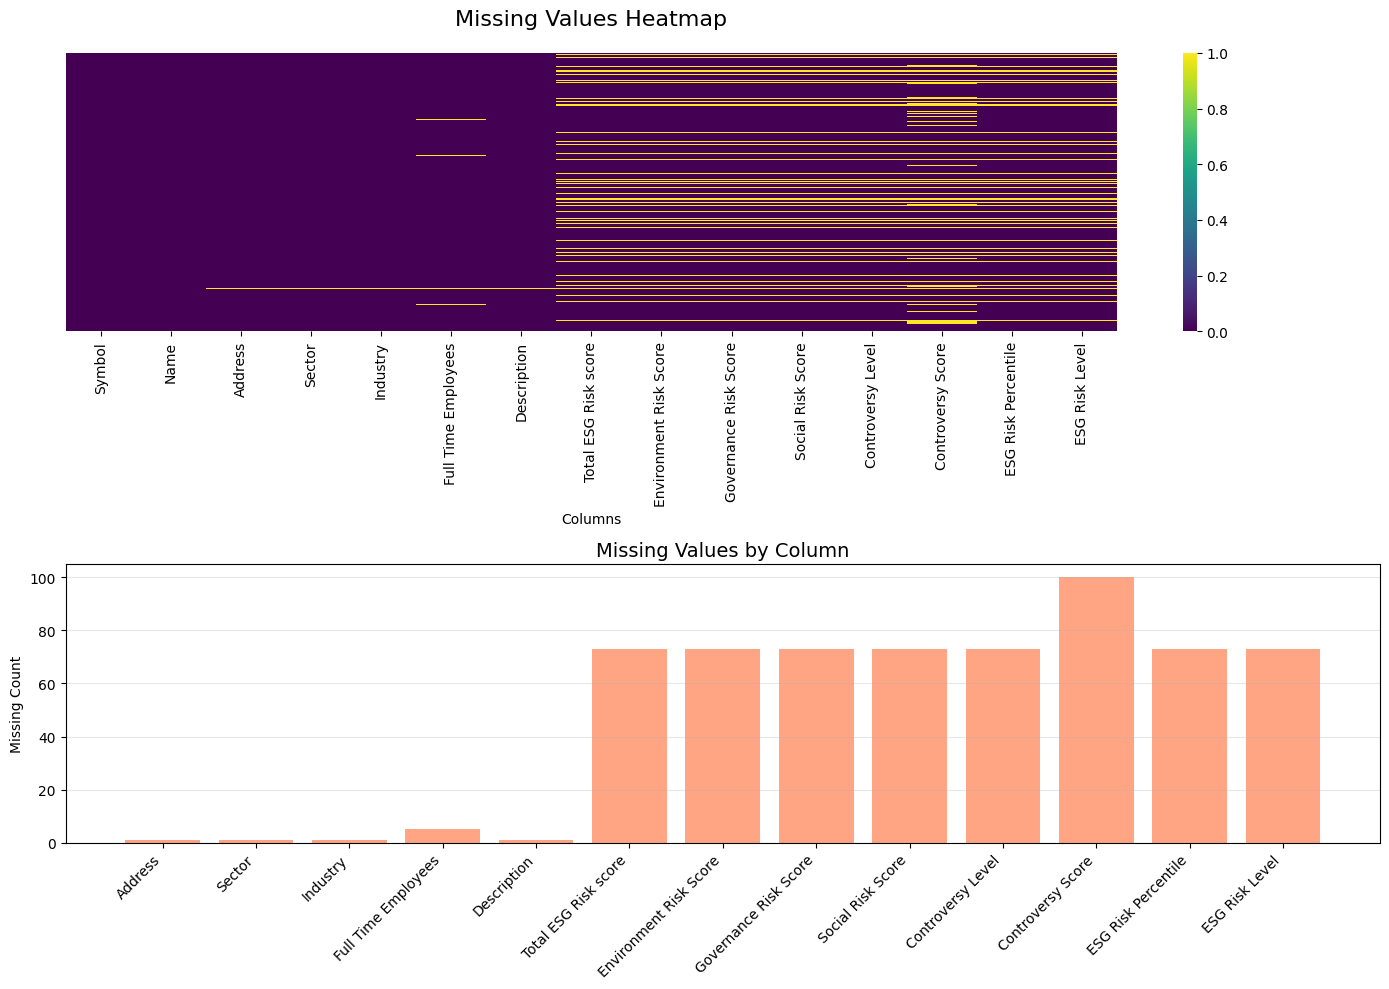

In [7]:
fig, axes = plt.subplots(2, 1, figsize=(14, 10))
sns.heatmap(df.isnull(), 
           cbar=True, 
           yticklabels=False,
           cmap='viridis',
           ax=axes[0])
axes[0].set_title('Missing Values Heatmap', fontsize=16, pad=20)
axes[0].set_xlabel('Columns')
missing_counts = df.isnull().sum()
missing_counts = missing_counts[missing_counts > 0]
if len(missing_counts) > 0:
    axes[1].bar(range(len(missing_counts)), missing_counts.values, 
               color='coral', alpha=0.7)
    axes[1].set_xticks(range(len(missing_counts)))
    axes[1].set_xticklabels(missing_counts.index, rotation=45, ha='right')
    axes[1].set_ylabel('Missing Count')
    axes[1].set_title('Missing Values by Column', fontsize=14)
    axes[1].grid(axis='y', alpha=0.3)
else:
    axes[1].text(0.5, 0.5, '🎉 No Missing Values Found!', 
                ha='center', va='center', fontsize=16, 
                transform=axes[1].transAxes)
    axes[1].set_title('Missing Values by Column', fontsize=14)
plt.tight_layout()
plt.show()


In [8]:
if 'Sector' in df.columns:
    sector_counts = df['Sector'].value_counts()
    print("🏭 Sector Distribution:")
    print("=" * 40)
    for sector, count in sector_counts.items():
        percentage = (count / len(df)) * 100
        print(f"{sector:<25}: {count:4d} ({percentage:5.1f}%)")
    print(f"\n📊 Total Sectors: {len(sector_counts)}")
else:
    print("❌ 'Sector' column not found in dataset")


🏭 Sector Distribution:
Technology               :   76 ( 15.1%)
Industrials              :   73 ( 14.5%)
Financial Services       :   66 ( 13.1%)
Healthcare               :   65 ( 12.9%)
Consumer Cyclical        :   57 ( 11.3%)
Consumer Defensive       :   36 (  7.2%)
Utilities                :   32 (  6.4%)
Real Estate              :   31 (  6.2%)
Basic Materials          :   22 (  4.4%)
Energy                   :   22 (  4.4%)
Communication Services   :   22 (  4.4%)

📊 Total Sectors: 11


In [9]:
if 'Industry' in df.columns:
    industry_counts = df['Industry'].value_counts()
    print("🏗️ Top 15 Industries:")
    print("=" * 50)
    for industry, count in industry_counts.head(15).items():
        percentage = (count / len(df)) * 100
        print(f"{industry:<30}: {count:3d} ({percentage:4.1f}%)")
    print(f"\n📊 Total Industries: {len(industry_counts)}")
else:
    print("❌ 'Industry' column not found in dataset")


🏗️ Top 15 Industries:
Utilities - Regulated Electric:  23 ( 4.6%)
Specialty Industrial Machinery:  16 ( 3.2%)
Semiconductors                :  14 ( 2.8%)
Software - Application        :  13 ( 2.6%)
Aerospace & Defense           :  12 ( 2.4%)
Diagnostics & Research        :  12 ( 2.4%)
Medical Devices               :  11 ( 2.2%)
Information Technology Services:  11 ( 2.2%)
Software - Infrastructure     :  11 ( 2.2%)
Banks - Regional              :  10 ( 2.0%)
Oil & Gas E&P                 :  10 ( 2.0%)
Asset Management              :  10 ( 2.0%)
Specialty Chemicals           :  10 ( 2.0%)
Drug Manufacturers - General  :   9 ( 1.8%)
Entertainment                 :   9 ( 1.8%)

📊 Total Industries: 116


In [10]:
if 'Full Time Employees' in df.columns:
    df_clean = df.copy()
    if df_clean['Full Time Employees'].dtype == 'object':
        df_clean['Full Time Employees'] = df_clean['Full Time Employees'].str.replace(',', '').astype(float)
    employee_stats = df_clean['Full Time Employees'].describe()
    print("👥 Employee Statistics:")
    print("=" * 30)
    print(f"Average: {employee_stats['mean']:,.0f}")
    print(f"Median:  {employee_stats['50%']:,.0f}")
    print(f"Min:     {employee_stats['min']:,.0f}")
    print(f"Max:     {employee_stats['max']:,.0f}")
    print(f"Std Dev: {employee_stats['std']:,.0f}")
else:
    print("❌ 'Full Time Employees' column not found")


👥 Employee Statistics:
Average: 58,395
Median:  21,585
Min:     28
Max:     2,100,000
Std Dev: 139,432


In [11]:
esg_columns = []
for col in df.columns:
    if any(keyword in col.lower() for keyword in ['esg', 'risk', 'score', 'environment', 'social', 'governance']):
        if df[col].dtype in ['int64', 'float64']:
            esg_columns.append(col)
print("📊 ESG-Related Numeric Columns:")
print("=" * 40)
for i, col in enumerate(esg_columns, 1):
    print(f"{i}. {col}")
if esg_columns:
    esg_stats = df[esg_columns].describe()
    print("\n📈 ESG Scores Statistical Summary:")
    print("=" * 80)
    display(esg_stats.round(2))
else:
    print("\n❌ No numeric ESG columns found")


📊 ESG-Related Numeric Columns:
1. Total ESG Risk score
2. Environment Risk Score
3. Governance Risk Score
4. Social Risk Score
5. Controversy Score

📈 ESG Scores Statistical Summary:


,Total ESG Risk score,Environment Risk Score,Governance Risk Score,Social Risk Score,Controversy Score
count,430.00,430.00,430.00,430.00,403.00
mean,21.53,5.74,6.73,9.07,2.01
std,6.89,5.09,2.21,3.66,0.79
min,7.10,0.00,3.00,0.80,1.00
25%,16.40,1.80,5.30,6.70,1.00
50%,21.05,4.05,6.10,8.90,2.00
75%,26.00,8.95,7.68,11.20,2.00
max,41.70,25.00,19.40,22.50,5.00


In [12]:
if 'ESG Risk Level' in df.columns:
    risk_level_counts = df['ESG Risk Level'].value_counts()
    print("⚠️ ESG Risk Level Distribution:")
    print("=" * 35)
    for level, count in risk_level_counts.items():
        percentage = (count / len(df)) * 100
        print(f"{level:<15}: {count:4d} ({percentage:5.1f}%)")
if 'Controversy Level' in df.columns:
    controversy_counts = df['Controversy Level'].value_counts()
    print("\n🚨 Controversy Level Distribution:")
    print("=" * 40)
    for level, count in controversy_counts.items():
        percentage = (count / len(df)) * 100
        print(f"{level:<20}: {count:4d} ({percentage:5.1f}%)")


⚠️ ESG Risk Level Distribution:
Low            :  187 ( 37.2%)
Medium         :  184 ( 36.6%)
High           :   50 (  9.9%)
Negligible     :    6 (  1.2%)
Severe         :    3 (  0.6%)

🚨 Controversy Level Distribution:
Moderate Controversy Level:  199 ( 39.6%)
Low Controversy Level:  108 ( 21.5%)
Significant Controversy Level:   83 ( 16.5%)
None Controversy Level:   27 (  5.4%)
High Controversy Level:   11 (  2.2%)
Severe Controversy Level:    2 (  0.4%)


In [13]:
if 'Sector' in df.columns:
    sector_counts = df['Sector'].value_counts()
    if PLOTLY_AVAILABLE:
        try:
            fig = go.Figure(data=[go.Pie(
                labels=sector_counts.index,
                values=sector_counts.values,
                hole=0.4,
                textinfo='label+percent',
                textposition='outside',
                marker=dict(line=dict(color='#FFFFFF', width=2))
            )])
            fig.update_layout(
                title={
                    'text': '🏭 Company Distribution by Sector',
                    'x': 0.5,
                    'font': {'size': 20}
                },
                height=600,
                showlegend=True,
                legend=dict(
                    orientation="v",
                    yanchor="middle",
                    y=0.5,
                    xanchor="left",
                    x=1.01
                )
            )
            fig.show()
        except Exception as e:
            print(f"Plotly error: {e}")
            print("Falling back to matplotlib...")
            PLOTLY_AVAILABLE = False
    if not PLOTLY_AVAILABLE:
        plt.figure(figsize=(12, 8))
        colors = plt.cm.Set3(range(len(sector_counts)))
        wedges, texts, autotexts = plt.pie(sector_counts.values, 
                                          labels=sector_counts.index, 
                                          autopct='%1.1f%%',
                                          colors=colors,
                                          startangle=90)
        plt.title('🏭 Company Distribution by Sector', fontsize=16, pad=20)
        plt.axis('equal')
        plt.tight_layout()
        plt.show()


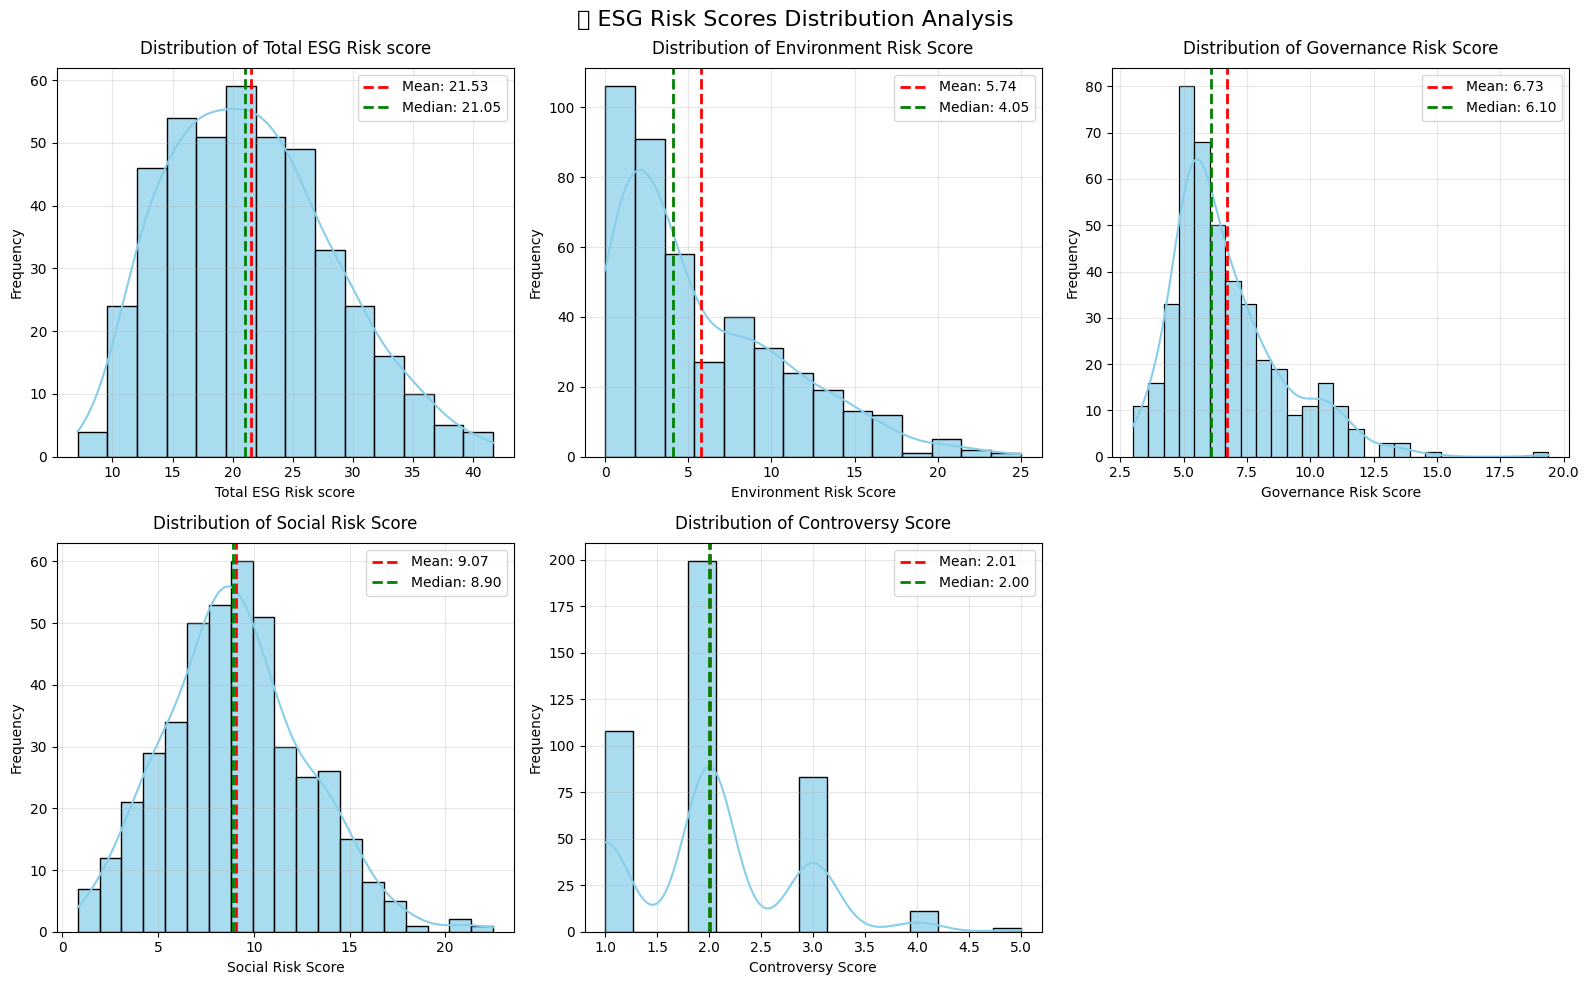

In [14]:
if esg_columns:
    n_cols = min(3, len(esg_columns))
    n_rows = (len(esg_columns) + n_cols - 1) // n_cols
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 5*n_rows))
    if n_rows == 1 and n_cols == 1:
        axes = [axes]
    elif n_rows == 1:
        axes = axes.reshape(1, -1)
    elif n_cols == 1:
        axes = axes.reshape(-1, 1)
    for i, col in enumerate(esg_columns):
        row = i // n_cols
        col_idx = i % n_cols
        ax = axes[row, col_idx] if n_rows > 1 else axes[col_idx]
        data = df[col].dropna()
        if len(data) > 0:
            sns.histplot(data, kde=True, ax=ax, alpha=0.7, color='skyblue')
            ax.axvline(data.mean(), color='red', linestyle='--', 
                      label=f'Mean: {data.mean():.2f}', linewidth=2)
            ax.axvline(data.median(), color='green', linestyle='--', 
                      label=f'Median: {data.median():.2f}', linewidth=2)
            ax.set_title(f'Distribution of {col}', fontsize=12, pad=10)
            ax.set_xlabel(col)
            ax.set_ylabel('Frequency')
            ax.legend()
            ax.grid(alpha=0.3)
        else:
            ax.text(0.5, 0.5, 'No Data', ha='center', va='center', 
                   transform=ax.transAxes, fontsize=16)
            ax.set_title(f'{col} - No Data Available')
    for i in range(len(esg_columns), n_rows * n_cols):
        row = i // n_cols
        col_idx = i % n_cols
        ax = axes[row, col_idx] if n_rows > 1 else axes[col_idx]
        ax.set_visible(False)
    plt.suptitle('📈 ESG Risk Scores Distribution Analysis', fontsize=16, y=0.98)
    plt.tight_layout()
    plt.show()


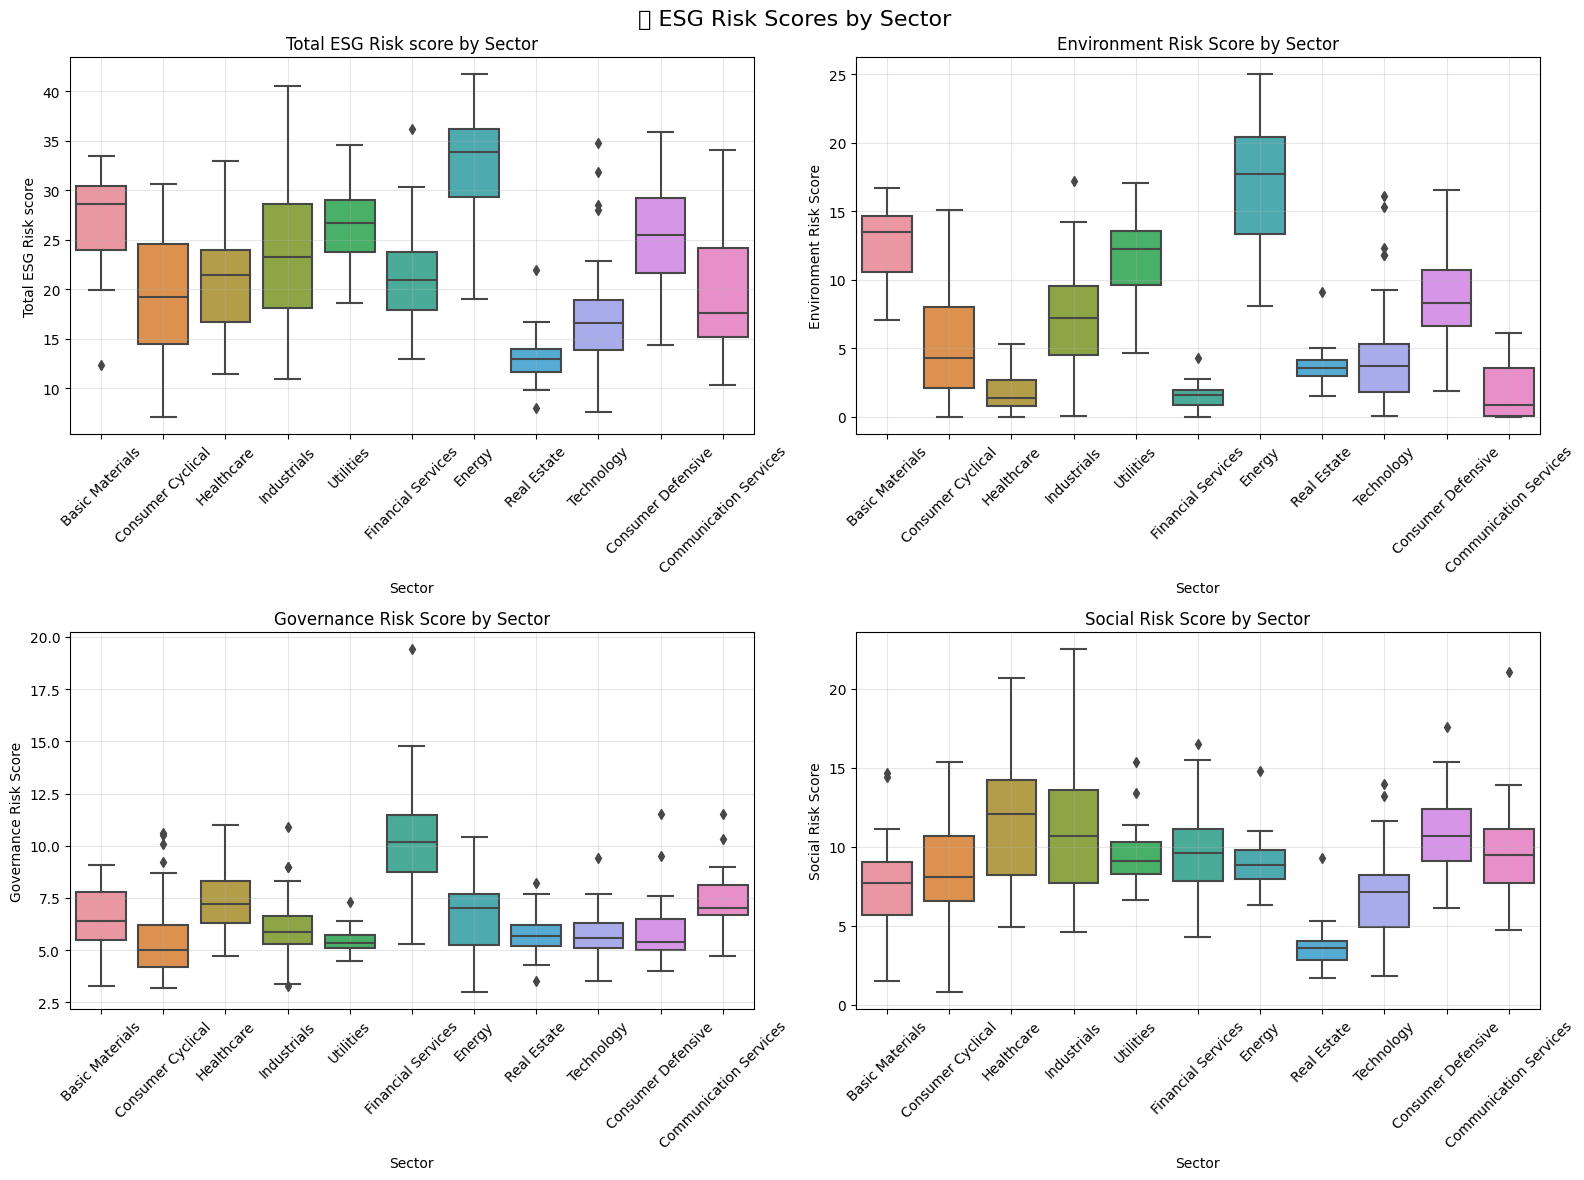

In [15]:
if 'Sector' in df.columns and esg_columns:
    key_esg_cols = [col for col in esg_columns if 'Total ESG' in col or 'Environment' in col or 'Social' in col or 'Governance' in col][:4]
    if key_esg_cols:
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        axes = axes.flatten()
        for i, col in enumerate(key_esg_cols[:4]):
            df_plot = df[[col, 'Sector']].dropna()
            if len(df_plot) > 0:
                sns.boxplot(data=df_plot, x='Sector', y=col, ax=axes[i])
                axes[i].set_title(f'{col} by Sector', fontsize=12)
                axes[i].tick_params(axis='x', rotation=45)
                axes[i].grid(alpha=0.3)
            else:
                axes[i].text(0.5, 0.5, 'No Data Available', 
                           ha='center', va='center', transform=axes[i].transAxes)
        for i in range(len(key_esg_cols), 4):
            axes[i].set_visible(False)
        plt.suptitle('📊 ESG Risk Scores by Sector', fontsize=16, y=0.98)
        plt.tight_layout()
        plt.show()


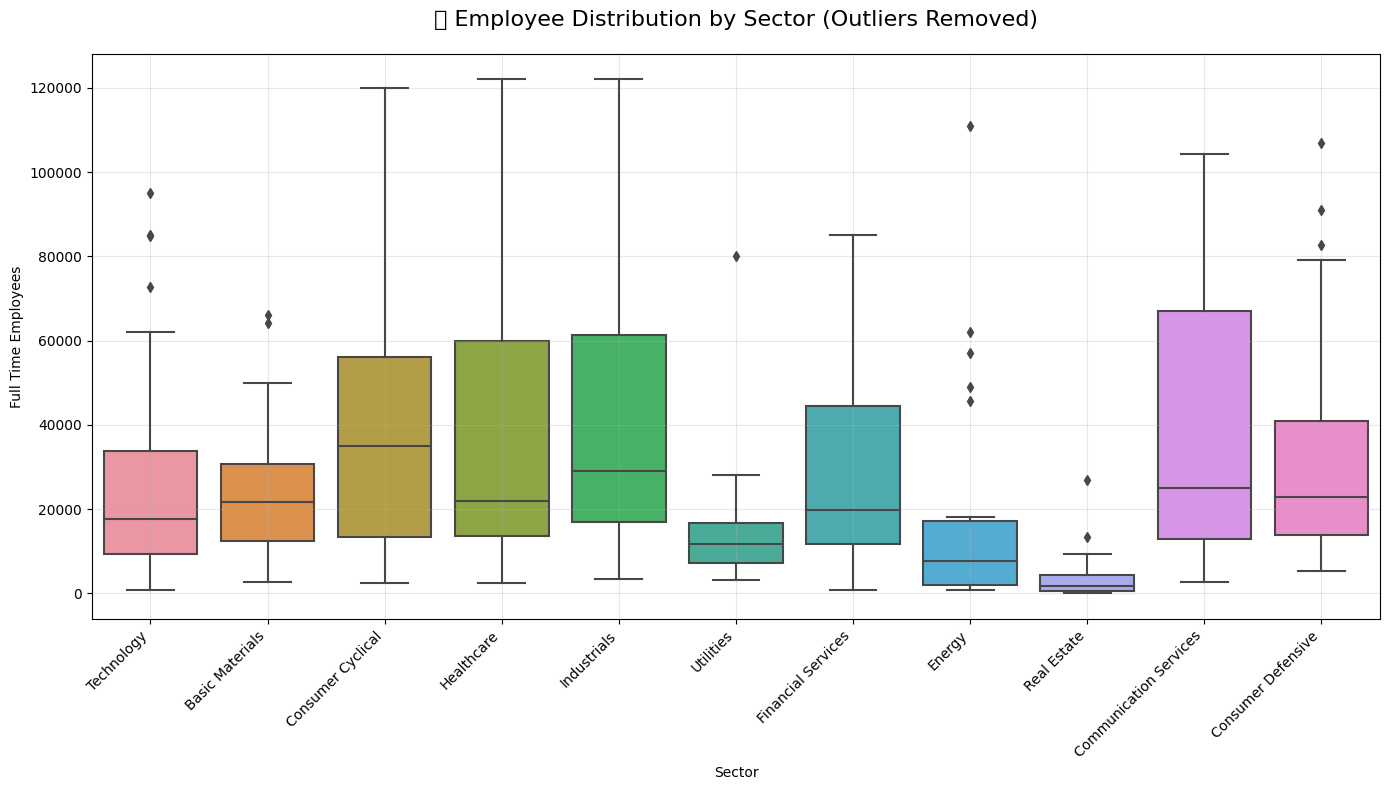

In [16]:
if 'Full Time Employees' in df.columns and 'Sector' in df.columns:
    df_emp = df.copy()
    if df_emp['Full Time Employees'].dtype == 'object':
        df_emp['Full Time Employees'] = df_emp['Full Time Employees'].str.replace(',', '').astype(float)
    Q1 = df_emp['Full Time Employees'].quantile(0.25)
    Q3 = df_emp['Full Time Employees'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_emp_clean = df_emp[(df_emp['Full Time Employees'] >= lower_bound) & 
                         (df_emp['Full Time Employees'] <= upper_bound)]
    plt.figure(figsize=(14, 8))
    sns.boxplot(data=df_emp_clean, x='Sector', y='Full Time Employees')
    plt.title('👥 Employee Distribution by Sector (Outliers Removed)', fontsize=16, pad=20)
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Full Time Employees')
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()


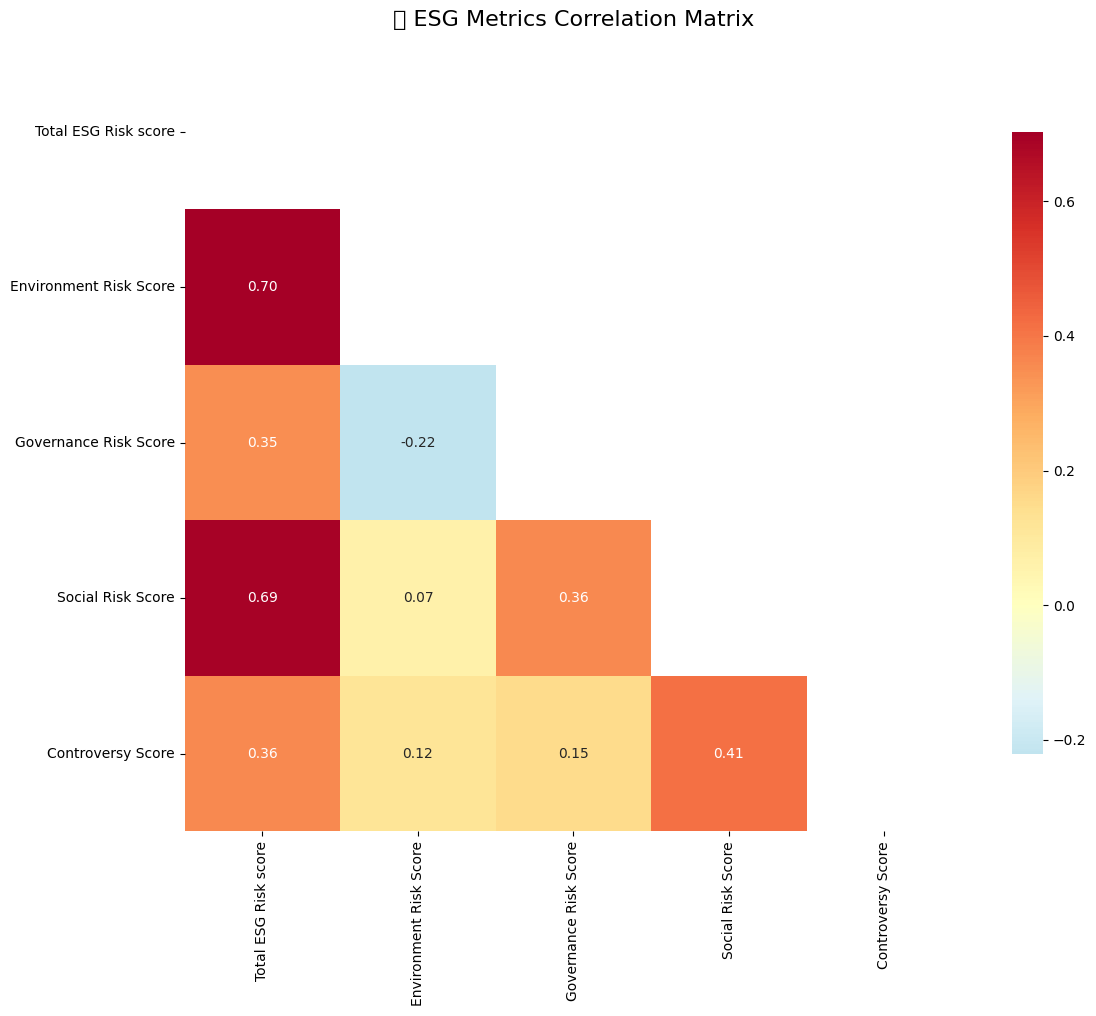

💡 Strong Correlations (|r| > 0.7):
Total ESG Risk score ↔ Environment Risk Score: 0.704


In [17]:
if len(esg_columns) >= 2:
    correlation_matrix = df[esg_columns].corr()
    plt.figure(figsize=(12, 10))
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    sns.heatmap(correlation_matrix, 
               mask=mask,
               annot=True, 
               cmap='RdYlBu_r',
               center=0,
               square=True,
               fmt='.2f',
               cbar_kws={'shrink': 0.8})
    plt.title('🔗 ESG Metrics Correlation Matrix', fontsize=16, pad=20)
    plt.tight_layout()
    plt.show()
    print("💡 Strong Correlations (|r| > 0.7):")
    print("=" * 45)
    strong_correlations = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            corr_val = correlation_matrix.iloc[i, j]
            if abs(corr_val) > 0.7 and not np.isnan(corr_val):
                strong_correlations.append((
                    correlation_matrix.columns[i],
                    correlation_matrix.columns[j],
                    corr_val
                ))
    if strong_correlations:
        for col1, col2, corr in sorted(strong_correlations, key=lambda x: abs(x[2]), reverse=True):
            print(f"{col1} ↔ {col2}: {corr:.3f}")
    else:
        print("No strong correlations found.")
else:
    print("❌ Insufficient ESG columns for correlation analysis")


In [18]:
if len(esg_columns) >= 3:
    top_esg_cols = esg_columns[:4]
    fig = px.scatter_matrix(
        df[top_esg_cols].dropna(),
        dimensions=top_esg_cols,
        title="🔍 ESG Metrics Scatter Plot Matrix",
        height=800
    )
    fig.update_layout(
        title={
            'x': 0.5,
            'font': {'size': 18}
        }
    )
    fig.show()


In [19]:
if esg_columns:
    outlier_summary = []
    for col in esg_columns:
        data = df[col].dropna()
        if len(data) > 0:
            Q1 = data.quantile(0.25)
            Q3 = data.quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers = data[(data < lower_bound) | (data > upper_bound)]
            outlier_percentage = (len(outliers) / len(data)) * 100
            outlier_summary.append({
                'Column': col,
                'Total_Values': len(data),
                'Outliers': len(outliers),
                'Outlier_Percentage': outlier_percentage,
                'Q1': Q1,
                'Q3': Q3,
                'IQR': IQR
            })
    outlier_df = pd.DataFrame(outlier_summary)
    print("🚨 Outlier Analysis Summary:")
    print("=" * 80)
    display(outlier_df.round(2))


🚨 Outlier Analysis Summary:


,Column,Total_Values,Outliers,Outlier_Percentage,Q1,Q3,IQR
0,Total ESG Risk score,430,3,0.70,16.4,26.00,9.60
1,Environment Risk Score,430,8,1.86,1.8,8.95,7.15
2,Governance Risk Score,430,20,4.65,5.3,7.68,2.38
3,Social Risk Score,430,4,0.93,6.7,11.20,4.50
4,Controversy Score,403,13,3.23,1.0,2.00,1.00


In [20]:
if esg_columns:
    print("📊 Normality Tests (Shapiro-Wilk Test):")
    print("=" * 50)
    print("H0: Data follows normal distribution")
    print("H1: Data does not follow normal distribution")
    print("Significance level: 0.05\n")
    for col in esg_columns[:5]:
        data = df[col].dropna()
        if len(data) > 3 and len(data) <= 5000:
            stat, p_value = stats.shapiro(data.sample(min(1000, len(data))))
            is_normal = "✅ Normal" if p_value > 0.05 else "❌ Not Normal"
            print(f"{col:<30}: p-value = {p_value:.4f} | {is_normal}")
        else:
            print(f"{col:<30}: Sample size not suitable for test")


📊 Normality Tests (Shapiro-Wilk Test):
H0: Data follows normal distribution
H1: Data does not follow normal distribution
Significance level: 0.05

Total ESG Risk score          : p-value = 0.0000 | ❌ Not Normal
Environment Risk Score        : p-value = 0.0000 | ❌ Not Normal
Governance Risk Score         : p-value = 0.0000 | ❌ Not Normal
Social Risk Score             : p-value = 0.0053 | ❌ Not Normal
Controversy Score             : p-value = 0.0000 | ❌ Not Normal


In [21]:
print("📋 COMPREHENSIVE DATA ANALYSIS SUMMARY")
print("=" * 70)
print("\n📊 DATASET OVERVIEW:")
print("-" * 30)
print(f"• Total Records: {len(df):,}")
print(f"• Total Features: {len(df.columns)}")
print(f"• Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"\n📈 DATA QUALITY:")
print("-" * 20)
total_values = df.shape[0] * df.shape[1]
missing_values = df.isnull().sum().sum()
completeness = ((total_values - missing_values) / total_values) * 100
print(f"• Data Completeness: {completeness:.1f}%")
print(f"• Missing Values: {missing_values:,}")
print(f"• Duplicate Rows: {df.duplicated().sum()}")
if 'Sector' in df.columns:
    print(f"\n🏭 SECTOR ANALYSIS:")
    print("-" * 25)
    sector_counts = df['Sector'].value_counts()
    print(f"• Total Sectors: {len(sector_counts)}")
    print(f"• Largest Sector: {sector_counts.index[0]} ({sector_counts.iloc[0]} companies)")
    print(f"• Smallest Sector: {sector_counts.index[-1]} ({sector_counts.iloc[-1]} companies)")
if 'Industry' in df.columns:
    industry_counts = df['Industry'].value_counts()
    print(f"• Total Industries: {len(industry_counts)}")
if esg_columns:
    print(f"\n📊 ESG METRICS ANALYSIS:")
    print("-" * 30)
    print(f"• ESG Metrics Available: {len(esg_columns)}")
    for col in esg_columns[:3]:
        data = df[col].dropna()
        if len(data) > 0:
            print(f"• {col}:")
            print(f"  - Range: {data.min():.1f} to {data.max():.1f}")
            print(f"  - Mean: {data.mean():.1f}")
            print(f"  - Standard Deviation: {data.std():.1f}")
if 'Full Time Employees' in df.columns:
    emp_data = df['Full Time Employees'].copy()
    if emp_data.dtype == 'object':
        emp_data = emp_data.str.replace(',', '').astype(float)
    emp_data = emp_data.dropna()
    if len(emp_data) > 0:
        print(f"\n👥 EMPLOYEE ANALYSIS:")
        print("-" * 25)
        print(f"• Companies with Employee Data: {len(emp_data)}")
        print(f"• Average Employees: {emp_data.mean():,.0f}")
        print(f"• Largest Company: {emp_data.max():,.0f} employees")
        print(f"• Smallest Company: {emp_data.min():,.0f} employees")
print("\n" + "="*70)


📋 COMPREHENSIVE DATA ANALYSIS SUMMARY

📊 DATASET OVERVIEW:
------------------------------
• Total Records: 503
• Total Features: 15
• Memory Usage: 1.04 MB

📈 DATA QUALITY:
--------------------
• Data Completeness: 91.8%
• Missing Values: 620
• Duplicate Rows: 0

🏭 SECTOR ANALYSIS:
-------------------------
• Total Sectors: 11
• Largest Sector: Technology (76 companies)
• Smallest Sector: Communication Services (22 companies)
• Total Industries: 116

📊 ESG METRICS ANALYSIS:
------------------------------
• ESG Metrics Available: 5
• Total ESG Risk score:
  - Range: 7.1 to 41.7
  - Mean: 21.5
  - Standard Deviation: 6.9
• Environment Risk Score:
  - Range: 0.0 to 25.0
  - Mean: 5.7
  - Standard Deviation: 5.1
• Governance Risk Score:
  - Range: 3.0 to 19.4
  - Mean: 6.7
  - Standard Deviation: 2.2

👥 EMPLOYEE ANALYSIS:
-------------------------
• Companies with Employee Data: 498
• Average Employees: 58,395
• Largest Company: 2,100,000 employees
• Smallest Company: 28 employees



In [22]:
print("💪 DATA STRENGTHS:")
print("=" * 25)
strengths = [
    f"✅ Comprehensive dataset with {len(df):,} company records",
    f"✅ Multi-dimensional ESG metrics ({len(esg_columns)} ESG-related features)",
    "✅ Sector and industry diversity for comparative analysis",
    "✅ Company-specific information (employees, descriptions)",
    "✅ Risk assessment categories and percentiles"
]
for strength in strengths:
    print(strength)
print("\n⚠️ DATA LIMITATIONS & AREAS FOR IMPROVEMENT:")
print("=" * 50)
limitations = []
missing_cols = df.isnull().sum()
high_missing = missing_cols[missing_cols > len(df) * 0.1]
if len(high_missing) > 0:
    limitations.append(f"❗ High missing values in {len(high_missing)} columns")
if 'Symbol' in df.columns:
    duplicate_symbols = df['Symbol'].duplicated().sum()
    if duplicate_symbols > 0:
        limitations.append(f"❗ {duplicate_symbols} duplicate company symbols")
if esg_columns and len(outlier_df) > 0:
    high_outlier_cols = outlier_df[outlier_df['Outlier_Percentage'] > 5]
    if len(high_outlier_cols) > 0:
        limitations.append(f"❗ High outlier percentage in {len(high_outlier_cols)} ESG metrics")
limitations.extend([
    "❗ No temporal data for trend analysis",
    "❗ Limited context about data collection methodology",
    "❗ No geographic information for regional analysis"
])
for limitation in limitations:
    print(limitation)
print("\n🎯 RECOMMENDATIONS FOR DATA ENHANCEMENT:")
print("=" * 45)
recommendations = [
    "🔧 Implement data validation rules to reduce missing values",
    "🔧 Add temporal dimension for trend analysis",
    "🔧 Include geographic/regional information",
    "🔧 Standardize ESG scoring methodology documentation",
    "🔧 Add financial performance metrics for correlation analysis",
    "🔧 Implement regular data quality audits"
]
for recommendation in recommendations:
    print(recommendation)

💪 DATA STRENGTHS:
✅ Comprehensive dataset with 503 company records
✅ Multi-dimensional ESG metrics (5 ESG-related features)
✅ Sector and industry diversity for comparative analysis
✅ Company-specific information (employees, descriptions)
✅ Risk assessment categories and percentiles

⚠️ DATA LIMITATIONS & AREAS FOR IMPROVEMENT:
❗ High missing values in 8 columns
❗ No temporal data for trend analysis
❗ Limited context about data collection methodology
❗ No geographic information for regional analysis

🎯 RECOMMENDATIONS FOR DATA ENHANCEMENT:
🔧 Implement data validation rules to reduce missing values
🔧 Add temporal dimension for trend analysis
🔧 Include geographic/regional information
🔧 Standardize ESG scoring methodology documentation
🔧 Add financial performance metrics for correlation analysis
🔧 Implement regular data quality audits
